In [15]:
from IPython.display import HTML
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

shap.initjs()

cali_X, cali_y = shap.datasets.california()

In [23]:
cali_X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [24]:
model = LinearRegression()
model.fit(cali_X, cali_y)

explainer = shap.KernelExplainer(model.predict, cali_X.iloc[:100, :])
shap_values = explainer.shap_values(cali_X.iloc[:100, :])

X does not have valid feature names, but LinearRegression was fitted with feature names
  0%|          | 0/100 [00:00<?, ?it/s]X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
  1%|          | 1/100 [00:00<00:12,  7.91it/s]X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
  3%|▎         | 3/100 [00:00<00:10,  9.27it/s]X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
  4%|▍         | 4/100 [00:00<00:10,  8.73it/s]X does not have valid featur

In [29]:
print(cali_X.shape)
print(len(shap_values))
print(shap_values[0].shape)

(20640, 8)
100
(8,)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


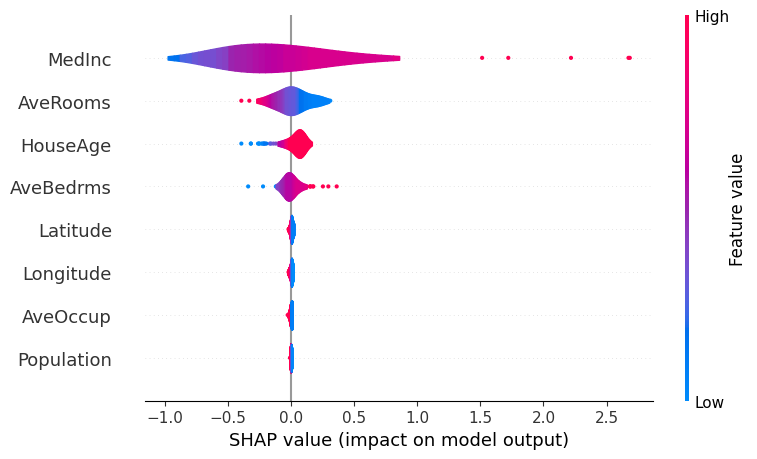

In [33]:
shap.summary_plot(shap_values, cali_X.iloc[:100, :], plot_type="violin")

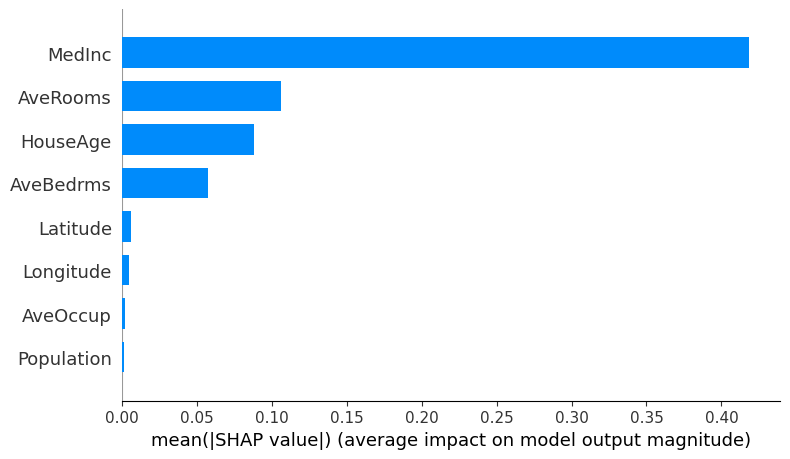

In [36]:
shap.summary_plot(shap_values, cali_X.iloc[:100, :], plot_type='bar')

In [39]:
explainer.expected_value

1.8217359381708678

In [44]:
force_plot = shap.force_plot(explainer.expected_value, shap_values[0], cali_X.iloc[0, :])
display(HTML(f"<div style='background-color:white;'>{shap.getjs() + force_plot.html()}</div>"))

In [46]:
force_plot = shap.force_plot(explainer.expected_value, shap_values, cali_X.iloc[:100, :])
display(HTML(f"<div style='background-color:white;'>{shap.getjs() + force_plot.html()}</div>"))

In [59]:
print(explainer.expected_value)
print(cali_y[:100].mean())
print(model.predict(cali_X.iloc[:100, :]).mean())

1.8217359381708678
1.5175200999999998
1.8217359381708673
